In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=80)

<Figure size 1280x960 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%pwd  #look at the current work dir

'C:\\Users\\meagv\\Google Drive'

In [ ]:
 data=pd.read_csv('NYSCOVID.csv', error_bad_lines = False)

In [ ]:
df=pd.read_csv('covidtest.csv', error_bad_lines=False)

In [ ]:
for col in data.columns:
    print(col)


Region
County
First Dose
Series Complete
Report as of


In [ ]:
data.describe

<bound method NDFrame.describe of                  Region       County  First Dose  Series Complete Report as of
0        Capital Region       Albany          69                0   12/14/2020
1      Western New York     Allegany           0                0   12/14/2020
2         New York City        Bronx           2                0   12/14/2020
3         Southern Tier       Broome           0                0   12/14/2020
4      Western New York  Cattaraugus           0                0   12/14/2020
...                 ...          ...         ...              ...          ...
19835    Capital Region   Washington       37189            35263   10/29/2021
19836      Finger Lakes        Wayne       57312            53892   10/29/2021
19837        Mid-Hudson  Westchester      750587           675291   10/29/2021
19838      Finger Lakes      Wyoming       20755            19377   10/29/2021
19839      Finger Lakes        Yates       12951            11936   10/29/2021

[19840 rows x 5 c

In [ ]:
df.describe

<bound method NDFrame.describe of         Test Date  County  New Positives  Cumulative Number of Positives  \
0      03/01/2020  Albany              0                               0   
1      03/02/2020  Albany              0                               0   
2      03/03/2020  Albany              0                               0   
3      03/04/2020  Albany              0                               0   
4      03/05/2020  Albany              0                               0   
...           ...     ...            ...                             ...   
37877  10/28/2021   Yates              9                            1704   
37878  10/29/2021   Yates              9                            1713   
37879  10/30/2021   Yates              3                            1716   
37880  10/31/2021   Yates              9                            1725   
37881  11/01/2021   Yates              5                            1730   

       Total Number of Tests Performed  Cumulative Nu

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines

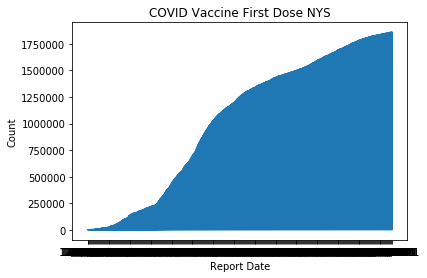

In [ ]:
plt.plot(data['Report as of'],data['First Dose'])
plt.title('COVID Vaccine First Dose NYS')
plt.xlabel('Report Date')
plt.ylabel('Count')
plt.show()

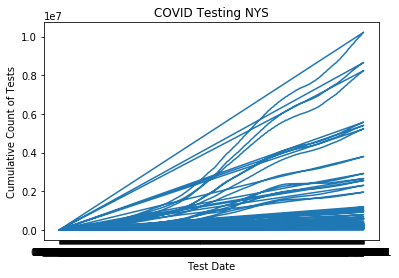

In [ ]:
plt.plot(df['Test Date'],df['Cumulative Number of Tests Performed'])
plt.title('COVID Testing NYS')
plt.xlabel('Test Date')
plt.ylabel('Cumulative Count of Tests')
plt.show()

In [ ]:
data['date'] = pd.to_datetime(data['Report as of'])

In [ ]:
data

,Region,County,First Dose,Series Complete,Report as of,date
0,Capital Region,Albany,69,0,12/14/2020,2020-12-14
1,Western New York,Allegany,0,0,12/14/2020,2020-12-14
2,New York City,Bronx,2,0,12/14/2020,2020-12-14
3,Southern Tier,Broome,0,0,12/14/2020,2020-12-14
4,Western New York,Cattaraugus,0,0,12/14/2020,2020-12-14
...,...,...,...,...,...,...
19835,Capital Region,Washington,37189,35263,10/29/2021,2021-10-29
19836,Finger Lakes,Wayne,57312,53892,10/29/2021,2021-10-29
19837,Mid-Hudson,Westchester,750587,675291,10/29/2021,2021-10-29
19838,Finger Lakes,Wyoming,20755,19377,10/29/2021,2021-10-29


In [ ]:
df1=data.set_index('date')


In [ ]:
df1

,Region,County,First Dose,Series Complete,Report as of
date,,,,,
2020-12-14,Capital Region,Albany,69,0,12/14/2020
2020-12-14,Western New York,Allegany,0,0,12/14/2020
2020-12-14,New York City,Bronx,2,0,12/14/2020
2020-12-14,Southern Tier,Broome,0,0,12/14/2020
2020-12-14,Western New York,Cattaraugus,0,0,12/14/2020
...,...,...,...,...,...
2021-10-29,Capital Region,Washington,37189,35263,10/29/2021
2021-10-29,Finger Lakes,Wayne,57312,53892,10/29/2021
2021-10-29,Mid-Hudson,Westchester,750587,675291,10/29/2021


In [ ]:
dfregion=df1.groupby(['Region']).resample('D').mean().reset_index()

In [ ]:
dfregion['Date']=dfregion['date']

In [ ]:
dfcounty=df1.groupby(['County']).resample('D').mean().reset_index()

In [ ]:
dfcounty

,County,date,First Dose,Series Complete
0,Albany,2020-12-14,69,0
1,Albany,2020-12-15,182,0
2,Albany,2020-12-16,375,3
3,Albany,2020-12-17,458,3
4,Albany,2020-12-18,702,3
...,...,...,...,...
19835,Yates,2021-10-25,12873,11894
19836,Yates,2021-10-26,12887,11897
19837,Yates,2021-10-27,12916,11912
19838,Yates,2021-10-28,12946,11934


In [ ]:
LI=df1[df1['Region']=='Long Island']

In [ ]:
LIavg=LI.resample('D').mean().reset_index()

In [ ]:
LIcounty=LI.groupby(['County']).resample('D').mean().reset_index()
LIcounty


,County,date,First Dose,Series Complete
0,Nassau,2020-12-14,1,0
1,Nassau,2020-12-15,98,0
2,Nassau,2020-12-16,486,1
3,Nassau,2020-12-17,957,2
4,Nassau,2020-12-18,1656,7
...,...,...,...,...
635,Suffolk,2021-10-25,1081523,978010
636,Suffolk,2021-10-26,1082874,979422
637,Suffolk,2021-10-27,1084674,981218
638,Suffolk,2021-10-28,1086025,982369


In [ ]:
LIcounty
S=LIcounty[LIcounty['County']=='Suffolk']
N=LIcounty[LIcounty['County']=='Nassau']

In [ ]:
N

,County,date,First Dose,Series Complete
0,Nassau,2020-12-14,1,0
1,Nassau,2020-12-15,98,0
2,Nassau,2020-12-16,486,1
3,Nassau,2020-12-17,957,2
4,Nassau,2020-12-18,1656,7
...,...,...,...,...
315,Nassau,2021-10-25,1088933,986080
316,Nassau,2021-10-26,1090340,987347
317,Nassau,2021-10-27,1091701,988648
318,Nassau,2021-10-28,1093825,989998


In [ ]:
import plotly.express as px

dfcounty2=dfcounty1[dfcounty1['County'] =='Suffolk']

In [ ]:
fig = px.line(dfcounty2, x = 'date',
y='Cumulative Number of Tests Performed',color='County' ,
title = 'COVID Tests by County')
fig.show()


In [ ]:
py.plot(fig, filename="COVIDNYtestcounty", auto_open = True)

'https://plotly.com/~meagvo/4/'

In [ ]:
import plotly.graph_objects as go

In [ ]:
!pip install chart-studio

You should consider upgrading via the 'c:\users\meagv\.conda\python.exe -m pip install --upgrade pip' command.


In [ ]:
import chart_studio
username='meagvo'
api_key='**'
chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)

In [ ]:
LI

,Region,County,First Dose,Series Complete,Report as of
date,,,,,
2020-12-14,Long Island,Nassau,1,0,12/14/2020
2020-12-14,Long Island,Suffolk,1,0,12/14/2020
2020-12-15,Long Island,Nassau,98,0,12/15/2020
2020-12-15,Long Island,Suffolk,25,0,12/15/2020
2020-12-16,Long Island,Nassau,486,1,12/16/2020
...,...,...,...,...,...
2021-10-27,Long Island,Suffolk,1084674,981218,10/27/2021
2021-10-28,Long Island,Nassau,1093825,989998,10/28/2021
2021-10-28,Long Island,Suffolk,1086025,982369,10/28/2021


In [ ]:
df.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,03/01/2020,Albany,0,0,0,0
1,03/02/2020,Albany,0,0,0,0
2,03/03/2020,Albany,0,0,0,0
3,03/04/2020,Albany,0,0,0,0
4,03/05/2020,Albany,0,0,3,3


In [ ]:
dftest=df

dftest['date']=pd.to_datetime(df['Test Date'])

dftest=df.set_index('date')


In [ ]:
dfcounty1=dftest.groupby(['County']).resample('D').mean().reset_index()

In [ ]:
dfcounty1

,County,date,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,Albany,2020-03-01,0,0,0,0
1,Albany,2020-03-02,0,0,0,0
2,Albany,2020-03-03,0,0,0,0
3,Albany,2020-03-04,0,0,0,0
4,Albany,2020-03-05,0,0,3,3
...,...,...,...,...,...,...
37877,Yates,2021-10-28,9,1704,198,58338
37878,Yates,2021-10-29,9,1713,156,58494
37879,Yates,2021-10-30,3,1716,97,58591
37880,Yates,2021-10-31,9,1725,87,58678


In [ ]:
Suffolk=dfcounty1[dfcounty1['County']=='Suffolk']

In [ ]:
Nassau=dfcounty1[dfcounty1['County']=='Nassau']

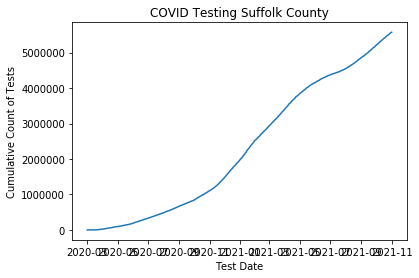

In [ ]:
plt.plot(Suffolk['date'],Suffolk['Cumulative Number of Tests Performed'])
plt.title('COVID Testing Suffolk County')
plt.xlabel('Test Date')
plt.ylabel('Cumulative Count of Tests')
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(go.Scatter(x=S['date'], y=S['First Dose'], name = 'Suffolk First Dose of Vaccine',
                         line=dict(color='red', width=1, dash='dash')), secondary_y=True)
fig2.add_trace(go.Scatter(x=N['date'], y=N['First Dose'], name = 'Nassau First Dose of Vaccine',
                         line=dict(color='blue', width=1, dash='dash')), secondary_y=True)

fig2.add_trace(go.Scatter(x=Suffolk['date'], y=Suffolk['Cumulative Number of Tests Performed'], name = 'Suffolk Tests',
                         line=dict(color='red', width=1, dash='solid')), secondary_y=False)
fig2.add_trace(go.Scatter(x=Nassau['date'], y=Nassau['Cumulative Number of Tests Performed'], name = 'Nassau Tests',
                         line=dict(color='blue', width=1, dash='solid')),secondary_y=False)
fig2.update_layout(title_text='COVID Test and Vaccines LI', title_x=0.4,
                 xaxis_title='Date')
fig2.update_yaxes(title_text="COVID Tests", secondary_y=False)
fig2.update_yaxes(title_text="First Dose of Vaccine (Count)", secondary_y=True)

fig2.add_annotation(x='2020-03-05', y=100,
                    xref="x",
        yref="y",
        text="First Test: 3/5/20",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=10,
            color="black"
            ),
        align="center",
       
        ax=20,
        ay=-30,
        bordercolor="black",
        borderwidth=1,
        borderpad=2,
        bgcolor="#ffffff",
        opacity=1
        )
fig2.add_annotation(x='2020-12-14', y=20,
                    xref="x",
        yref="y",
        text="First Vaccine: 12/14/20",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=10,
            color="black"
            ),
        align="center",
      
        ax=20,
        ay=-30,
        bordercolor="black",
        borderwidth=1,
        borderpad=2,
        bgcolor="#ffffff",
        opacity=1
        )

fig2.update_layout(
    
    updatemenus=[
        dict(active=0,
            buttons=list([
            dict(label="All",
                 method="update",
                 args=[{"visible":[True,True,True, True]},
                       {"title":"ALL"}]),
            dict(label="Suffolk",
                 method="update",
                 args=[{"visible":[True, False, True, False]},
                       {"title":"Suffolk"}]),
            dict(label="Nassau",
                 method="update",
                 args=[{"visible":[False,True,False, True]},
                       {"title":"Nassau"}]),
            dict(label="First Dose",
                 method="update",
                 args=[{"visible":[True, True, False,False]},
                       {"title":"First Dose"}]),
                       
            dict(label="Total Tests",
                 method="update",
                 args=[{"visible":[False,False, True, True]},
                       {"title":"Total Tests"}])
                       
        ]),
        )
    ]
)

fig2.show()

In [ ]:
import chart_studio.plotly as py
import chart_studio.tools as tls
py.plot(fig2, filename="COVIDNYtest1", auto_open = True)

'https://plotly.com/~meagvo/2/'